In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
class Simulation:
    def __init__(self, population_size):
        self.population_size = population_size
        self.population = np.random.random(self.population_size)
        self.longevity = np.zeros(population_size)
        self.gap = self.population.min()
        
        self.history = [self.population.copy()]
        self.longevity_history = [self.longevity.copy()]
        self.minima = [self.gap]
        self.maxima = [self.gap]
        self.time = 1
        
    def step(self, num):
        for _ in range(num):
            self.longevity += np.ones(self.population_size)

            # minima and maxima
            minval = self.population.min()
            
            if minval > self.gap:
                self.gap = minval
                
            self.minima.append(minval)
            self.maxima.append(self.gap)
            
            
            # mutate minimum cell and its neighbors
            ind = np.where(self.population == minval)[0][0]

            for i in range(3):
                self.longevity[(ind + i - 1) % self.population_size] = 0
                self.population[(ind + i - 1) % self.population_size] = np.random.random()
            
            
            # update simulation history
            self.history.append(self.population.copy())
            self.longevity_history.append(self.longevity.copy())
            
            self.time += 1

In [12]:
sim = Simulation(60)
sim.step(800)

[]

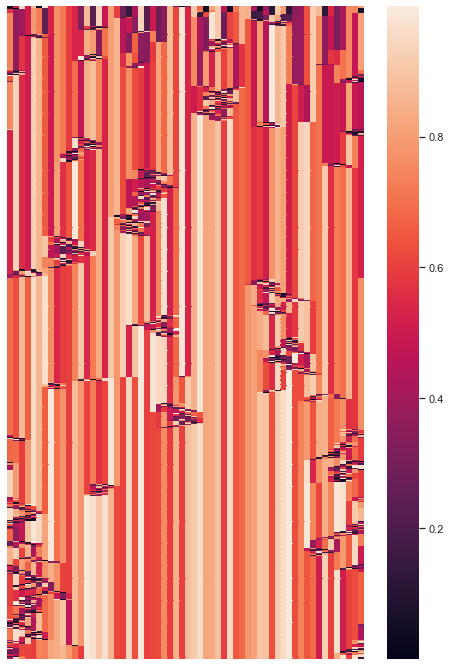

In [14]:
fig, ax = plt.subplots(figsize=(8,12))
ax = sns.heatmap(sim.history)
ax.set_xticks([])
ax.set_yticks([])

[]

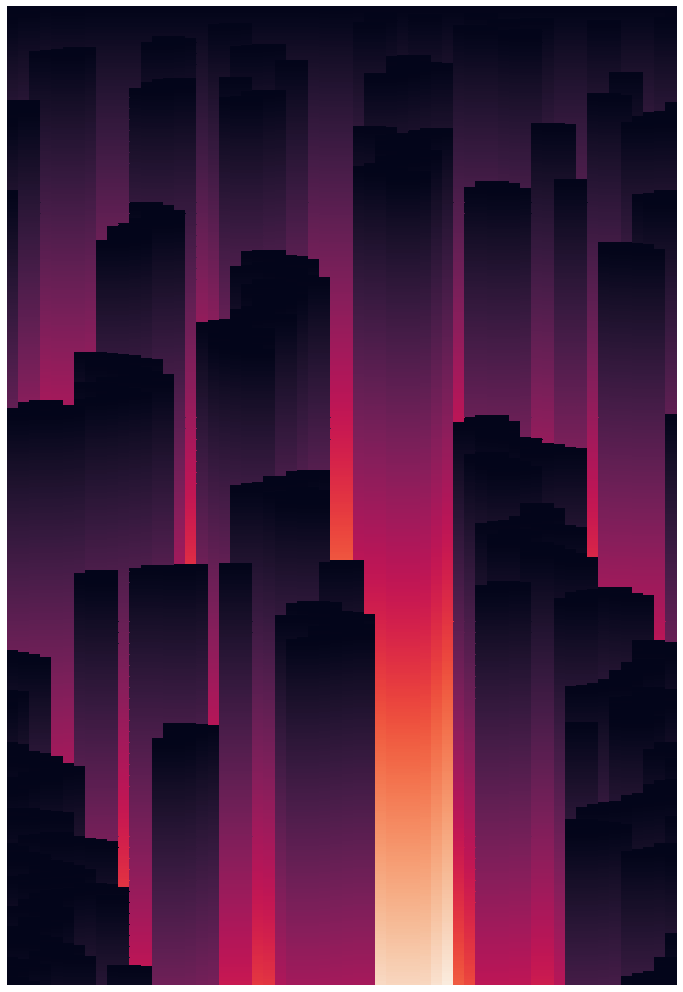

In [19]:
fig, ax = plt.subplots(figsize=(12,18))
ax = sns.heatmap(sim.longevity_history, cbar=False)
ax.set_xticks([])
ax.set_yticks([])

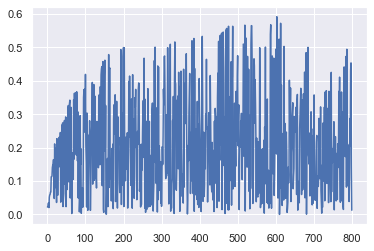

In [15]:
sns.lineplot(range(sim.time), sim.minima)  

# upper bound approaches 0.6670.. https://arxiv.org/pdf/adap-org/9510002.pdf

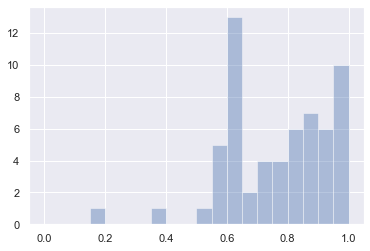

In [16]:
sns.distplot(sim.population, bins=20, kde=False, hist_kws={'range': (0,1)})  
# converges to uniform distribution on [0.6670..., 1]

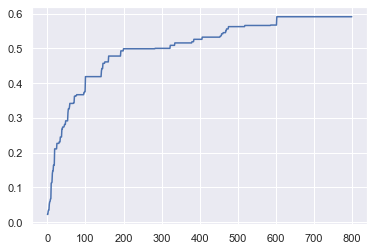

In [17]:
sns.lineplot(range(sim.time), sim.maxima)  

In [20]:
fig.savefig("model3.png", bbox_inches='tight')